## Imports and functions

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import utils 
import Pass
import numpy as np
import glob
from Scratch import Scratch
from scipy.interpolate import interp1d    

## Read and display data for series 200 (GRIND)

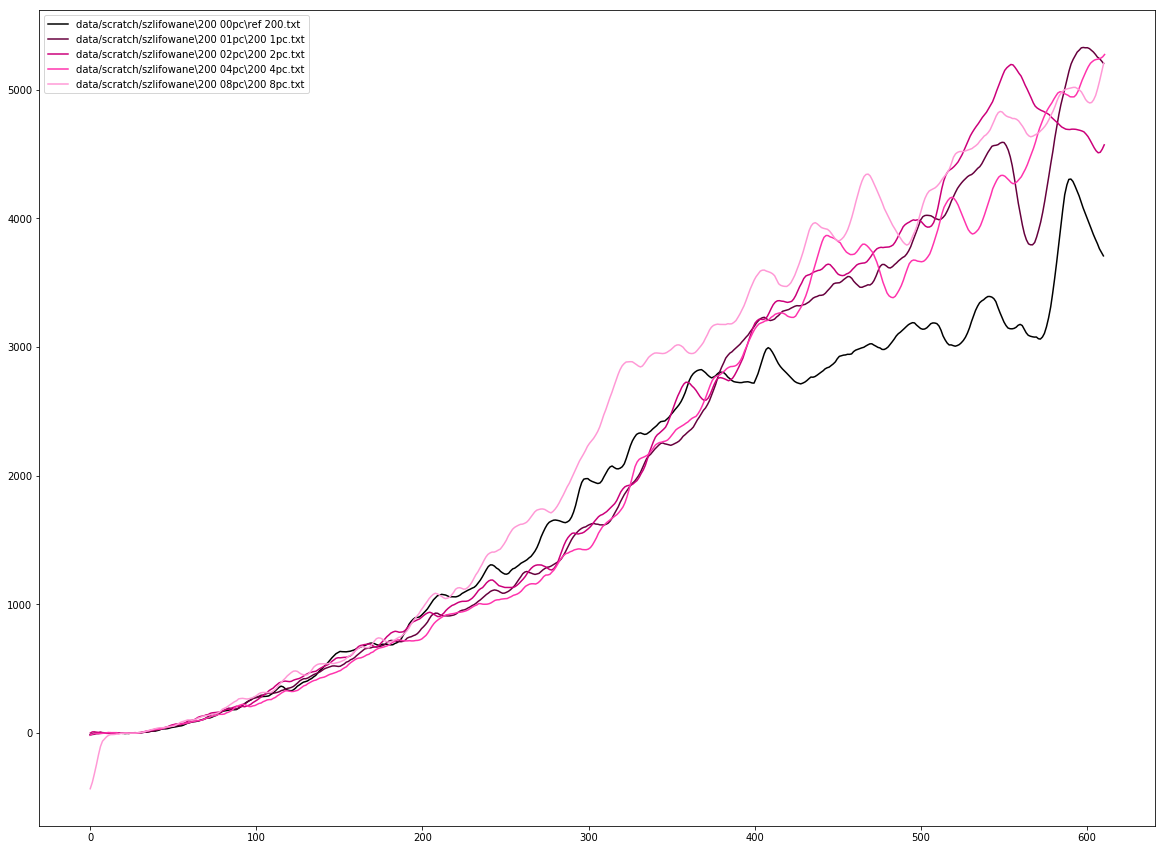

In [2]:
fileList = sorted(glob.glob('data/scratch/szlifowane/200*/*.txt'))
sampleList = [utils.read_data(file) for file in fileList]

fig = pyplot.figure(figsize=(20,15))
ax = fig.add_subplot(111)
utils.plot_scratch_samples(ax, sampleList, fileList, truncate=500)  


## Read and display data for sieries R7200 (GRIND)

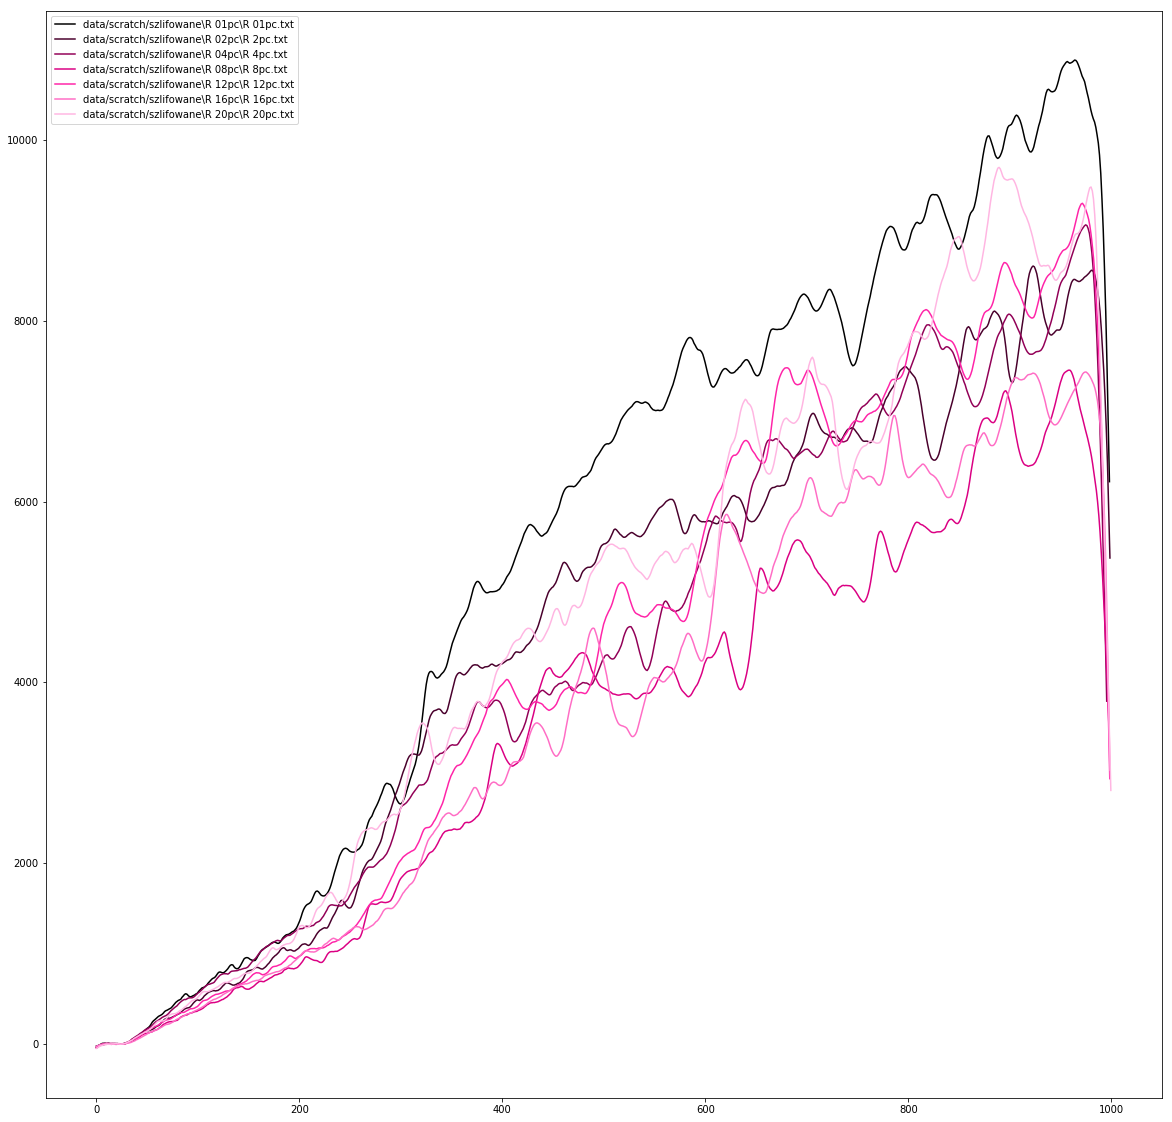

In [3]:
fileList = sorted(glob.glob('data/scratch/szlifowane/R*/*.txt'))
sampleList = [utils.read_data(file) for file in fileList]

fig = pyplot.figure(figsize=(20,20))
ax = fig.add_subplot(111)

utils.plot_scratch_samples(ax, sampleList, fileList, truncate=-1)  

## Read and display data for sieries 200 (SURFACE)

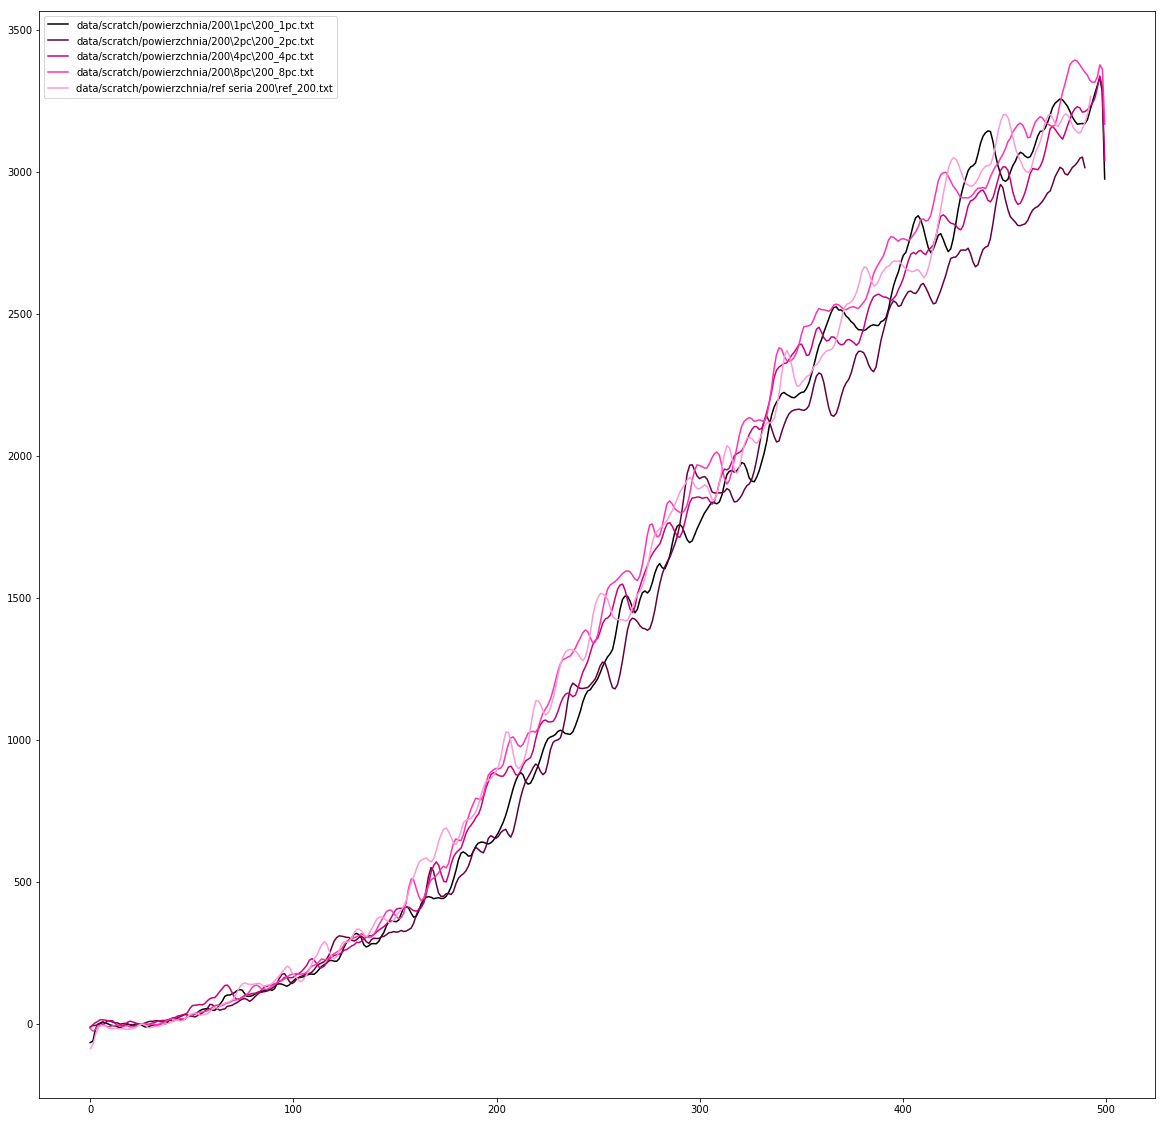

In [4]:
fileList = sorted(glob.glob('data/scratch/powierzchnia/200/*/*.txt')+glob.glob('data/scratch/powierzchnia/ref seria 200/*.txt'))
sampleList = [utils.read_data(file) for file in fileList]

fig = pyplot.figure(figsize=(20,20))
ax = fig.add_subplot(111)

utils.plot_scratch_samples(ax, sampleList, fileList, truncate=-1) 
#ax.set_yscale('log')
#ax.set_xscale('log')

## Read and display data for sieries R7200 (SURFACE)

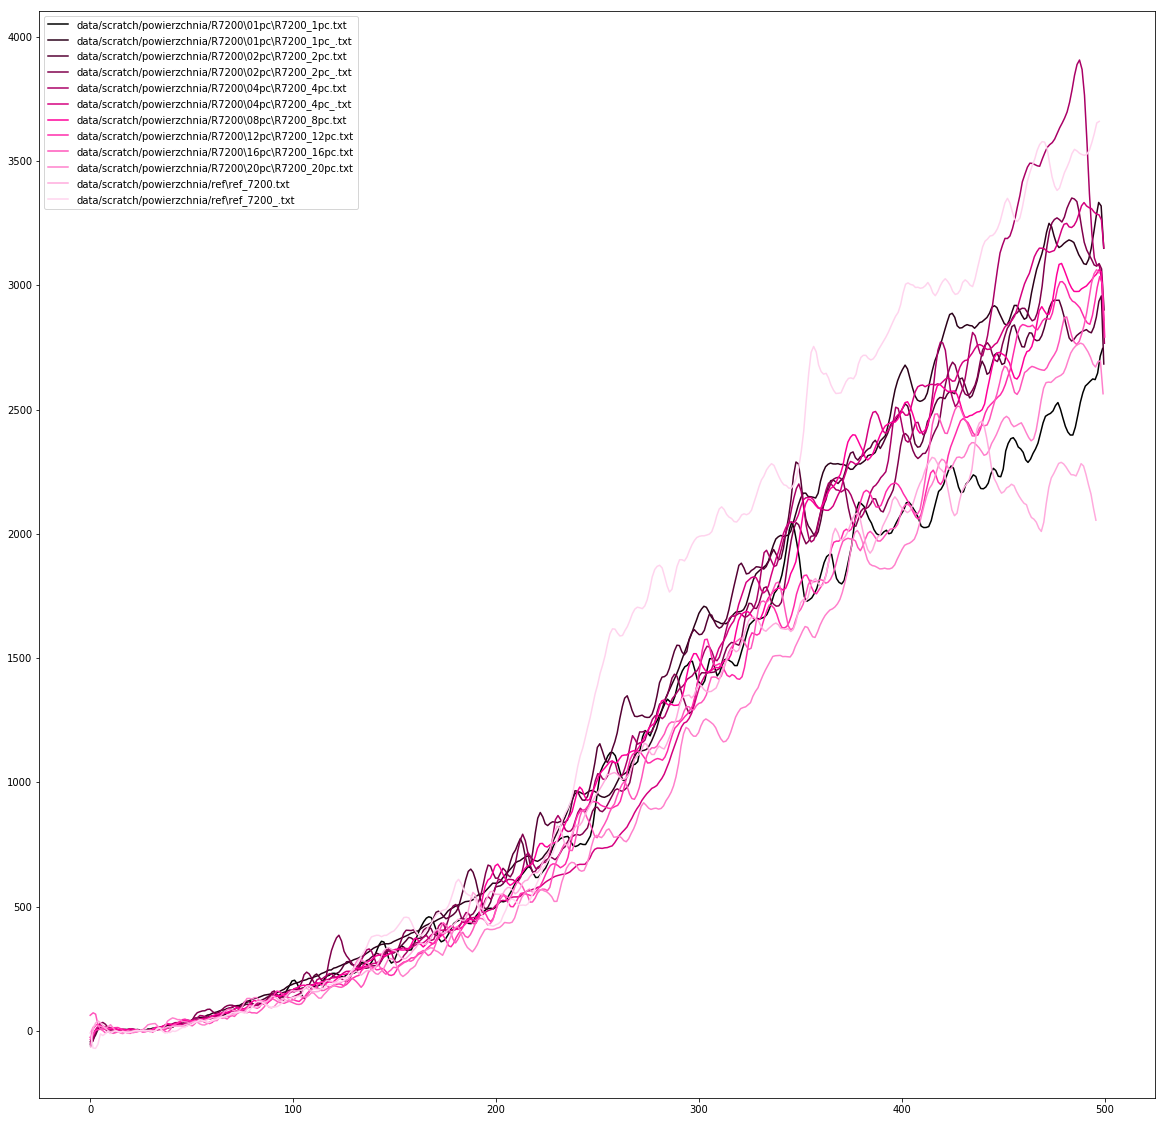

In [5]:
fileList = sorted(glob.glob('data/scratch/powierzchnia/R7200/*/*.txt')+glob.glob('data/scratch/powierzchnia/ref/*.txt'))
sampleList = [utils.read_data(file) for file in fileList]


fig = pyplot.figure(figsize=(20,20))
ax = fig.add_subplot(111)

utils.plot_scratch_samples(ax, sampleList, fileList, truncate=-1) 
#ax.set_yscale('log')
#ax.set_xscale('log')